## Spam Email Classifcation

Python Version: 3.11.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import string

### data cleaning:

In [11]:
data=pd.read_csv('../DATA/spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data['Spam']=data['Category'].apply(lambda x : 1 if x == 'spam' else 0)
data['Category']=data['Category'].apply(lambda x : 'real' if x == 'ham' else 'spam')
data.head()


,Category,Message,Spam
0,real,"Go until jurong point, crazy.. Available only ...",0
1,real,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,real,U dun say so early hor... U c already then say...,0
4,real,"Nah I don't think he goes to usf, he lives aro...",0


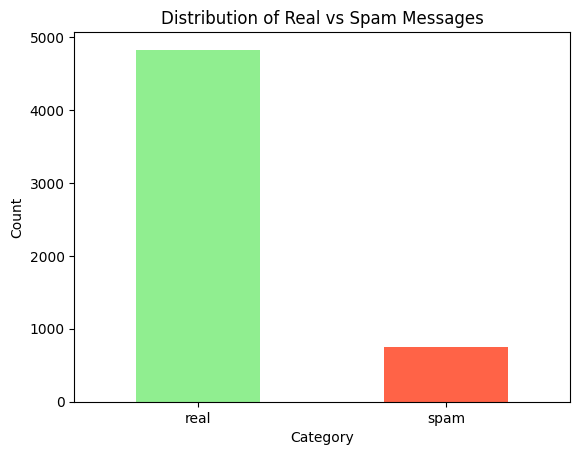

In [13]:
category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title('Distribution of Real vs Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
data['Word_Count'] = data['Message'].apply(lambda x: len(x.split()))
avg_word_count = data.groupby('Category')['Word_Count'].mean()
data.head()

,Category,Message,Spam,Word_Count
0,real,"Go until jurong point, crazy.. Available only ...",0,20
1,real,Ok lar... Joking wif u oni...,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,real,U dun say so early hor... U c already then say...,0,11
4,real,"Nah I don't think he goes to usf, he lives aro...",0,13


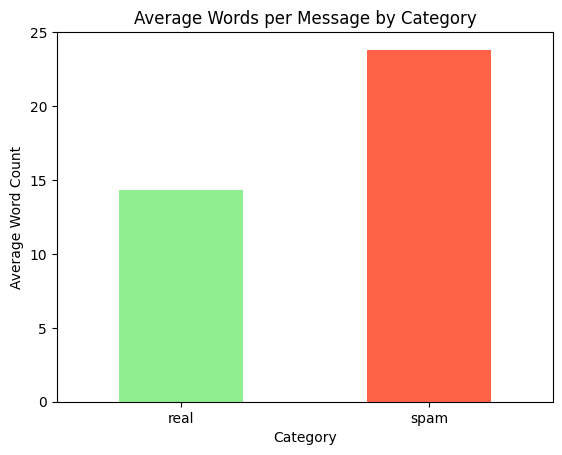

In [15]:
avg_word_count.plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title('Average Words per Message by Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)  # Ensure the labels on x-axis are horizontal
plt.show()

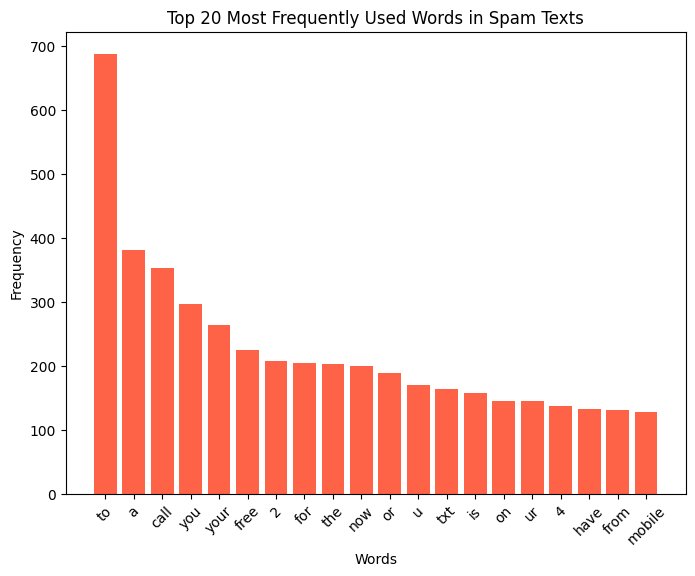

In [58]:
from collections import Counter
import re

data=pd.read_csv('../DATA/spam.csv')
spam_messages = data[data['Category'] == 'spam']['Message']
def clean_and_tokenize(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    words = text.lower().split()  # Convert to lowercase and split into words
    return words

# Tokenize all spam messages and count word frequency
all_words = []
for message in spam_messages:
    all_words.extend(clean_and_tokenize(message))

word_counts = Counter(all_words)

# Get the top 10 most common words
top_20_words = word_counts.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*top_20_words)

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(words, frequencies, color='tomato')
plt.title('Top 20 Most Frequently Used Words in Spam Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
duplicate_emails = len(data) - data['Message'].nunique()
print(len(data))
print(data['Message'].nunique())
print(duplicate_emails)


5572
5157
415


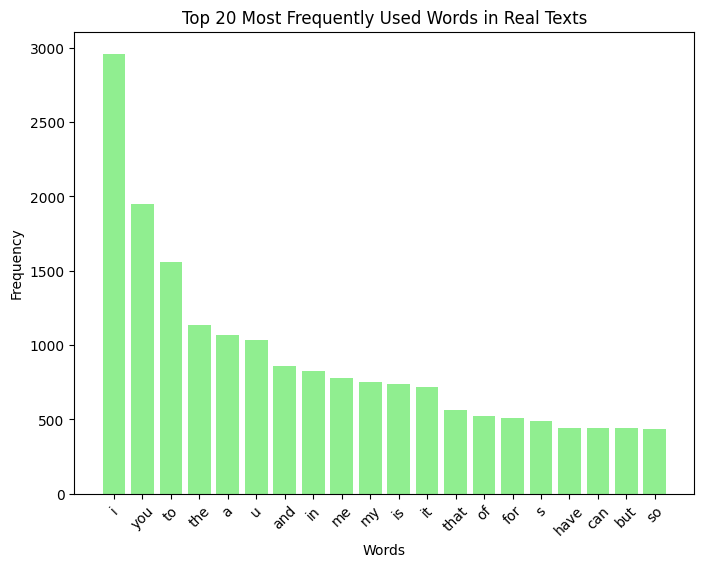

In [ ]:
data=pd.read_csv('../DATA/spam.csv')
messages = data[data['Category'] == 'ham']['Message']
def clean_and_tokenize(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    words = text.lower().split()  # Convert to lowercase and split into words
    return words

# Tokenize all messages and count word frequency
all_words = []
for message in messages:
    all_words.extend(clean_and_tokenize(message))

word_counts = Counter(all_words)

# Get the top 10 most common words
top_20_words = word_counts.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*top_20_words)

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(words, frequencies, color='lightgreen')
plt.title('Top 20 Most Frequently Used Words in Real Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
category_counts = data['Category'].value_counts()

# Print the counts
print(f"Non-spam (ham) texts: {category_counts['ham']}")
print(f"Spam texts: {category_counts['spam']}")


Non-spam (ham) texts: 4825
Spam texts: 747


In [19]:
# Download the stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# import data
data=pd.read_csv('../DATA/spam.csv')
data['Spam']=data['Category'].apply(lambda x : 1 if x == 'spam' else 0)
data['Category']=data['Category'].apply(lambda x : 'real' if x == 'ham' else 'spam')
df = pd.DataFrame(data)

# Text preprocessing function
def preprocess(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove stopwords
    return ' '.join([word for word in text.split() if word not in stop_words])


# Apply preprocessing to the 'text' column
df['text_clean'] = df['Message'].apply(preprocess)


# Initialize CountVectorizer to convert text to bag-of-words
vectorizer = CountVectorizer()


# Transform the text data into feature vectors (Bag of Words model)
X = vectorizer.fit_transform(df['text_clean'])


# Labels (target variable)
y = df['Category']


# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Naive Bayes classifier
nb = MultinomialNB()


# Train the classifier
nb.fit(X_train, y_train)


# Make predictions on the test set
y_pred = nb.predict(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Test the classifier with new messages
new_messages = ["Hi, how are you doing?", "Call your mom", "Win a lottery prize", "How are you?", "You have won $1000", "Meeting at 5pm"]


# Preprocess the new messages
new_messages_clean = [preprocess(msg) for msg in new_messages]


# Convert to feature vectors using the trained vectorizer
new_vectors = vectorizer.transform(new_messages_clean)


# Predict using the trained classifier
predictions = nb.predict(new_vectors)


# Output predictions for new messages
print("Predictions for New Messages:")

for i in range(len(new_messages)):
    print(predictions[i], "\t - " , new_messages[i])

Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

        real       0.99      0.98      0.98       966
        spam       0.87      0.93      0.90       149

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
# Words from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Spam class mapping
spam_class_index = 1

# Log probabilities for the spam class (index 1):
word_log_probs_spam = nb.feature_log_prob_[spam_class_index]

# Converting log probabilities back to regular probabilities
word_probs_spam = np.exp(word_log_probs_spam)

# Sort the words by their spam probabilities
sorted_indices = word_probs_spam.argsort()[::-1]

# Print the top 10 words most associated with spam
N = 10
print(f"Top {N} words most associated with spam emails:")
for i in sorted_indices[:N]:
    print(f"{feature_names[i]}: {word_probs_spam[i]:.4f}")


Top 10 words most associated with spam emails:
call: 0.0146
free: 0.0095
txt: 0.0061
ur: 0.0058
mobile: 0.0052
stop: 0.0051
text: 0.0051
reply: 0.0046
claim: 0.0046
get: 0.0035
